Superstore Sales Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load data to DataFrame

In [3]:
file = r"C:\Users\jakub\Documents\Python Data Analysis Projects\superstore_sales_data.csv"
df = pd.read_csv(file, delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.shape

(9800, 18)

In [5]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
# describe dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Row ID,9800.0,NaN,NaN,NaN,4900.5,2829.160653,1.0,2450.75,4900.5,7350.25,9800.0
Order ID,9800,4922,CA-2018-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9800,1230,05/09/2017,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9800,1326,26/09/2018,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9800,4,Standard Class,5859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9800,793,WB-21850,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9800,793,William Brown,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9800,3,Consumer,5101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9800,1,United States,9800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9800,529,New York City,891,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Cleaning

In [7]:
# check null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
# replace blank values, single space and single hyphens by NaN value
df.replace(['', ' ', '-'], np.nan, inplace=True)
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
# change name of columns to lower and replace space in name
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9800 non-null   int64  
 1   order_id       9800 non-null   object 
 2   order_date     9800 non-null   object 
 3   ship_date      9800 non-null   object 
 4   ship_mode      9800 non-null   object 
 5   customer_id    9800 non-null   object 
 6   customer_name  9800 non-null   object 
 7   segment        9800 non-null   object 
 8   country        9800 non-null   object 
 9   city           9800 non-null   object 
 10  state          9800 non-null   object 
 11  postal_code    9789 non-null   float64
 12  region         9800 non-null   object 
 13  product_id     9800 non-null   object 
 14  category       9800 non-null   object 
 15  sub-category   9800 non-null   object 
 16  product_name   9800 non-null   object 
 17  sales          9800 non-null   float64
dtypes: float

In [10]:
# change data type of columns
df.postal_code = df.postal_code.astype(str)
df.order_date = pd.DatetimeIndex(df.order_date, dayfirst=True)
df.ship_date = pd.DatetimeIndex(df.ship_date, dayfirst=True)

# add month and year of order date
df['order_year'] = pd.DatetimeIndex(df.order_date).year
df['order_year'] = df.order_year.astype(str)
df['order_month'] = pd.DatetimeIndex(df.order_date).month

df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,order_year,order_month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


Explorative Data Analysis

In [11]:
# total sales by category
data = df.groupby('category')['sales'].sum()\
    .reset_index(name='sales')\
    .sort_values('sales', ascending=False)
data

,category,sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


<function matplotlib.pyplot.show(close=None, block=None)>

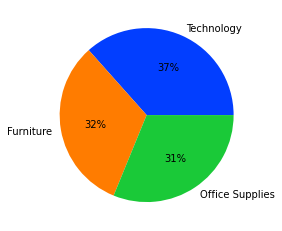

In [12]:
color_pallete = sns.color_palette('bright')
plt.pie(data['sales'], labels=data['category'], colors=color_pallete, autopct='%.0f%%')
plt.show

In [13]:
# function to return sales by user-defined column
def sum_by(data, num_col, by_col, order_by, ordering=False):
    total_sales = data.groupby(by_col)[num_col].sum()\
        .reset_index(name=num_col)\
        .sort_values(order_by, ascending=ordering)
    return total_sales

In [14]:
# Total sales by sub-category
data = sum_by(df, 'sales', 'sub-category','sales', False)
data

,sub-category,sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


Text(0, 0.5, 'Sub-Category')

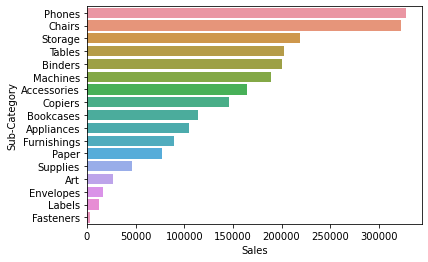

In [15]:
sns.barplot(x=data['sales'], y=data['sub-category'])
plt.xlabel('Sales')
plt.ylabel('Sub-Category')

In [16]:
# Total sales by year
data = sum_by(df, 'sales', 'order_year', 'sales', ordering=True)
data

,order_year,sales
1,2016,459436.0054
0,2015,479856.2081
2,2017,600192.5500
3,2018,722052.0192


<AxesSubplot:xlabel='order_year', ylabel='sales'>

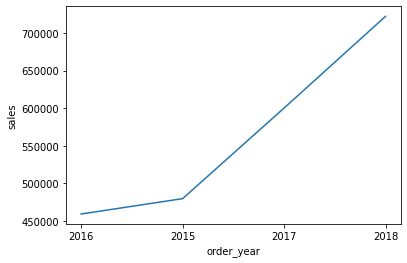

In [17]:
sns.lineplot(x=data['order_year'], y=data['sales'])

In [25]:
# sales in month
data = sum_by(df, 'sales', ['order_year','order_month'], 'order_month', ordering=True)
data

,order_year,order_month,sales
0,2015,1,14205.7070
24,2017,1,18542.4910
36,2018,1,43476.4740
12,2016,1,18066.9576
1,2015,2,4519.8920
25,2017,2,22978.8150
13,2016,2,11951.4110
37,2018,2,19920.9974
26,2017,3,51165.0590
38,2018,3,58863.4128


In [19]:
# sales by region and state
data = sum_by(df, 'sales', ['region', 'state'], ['region', 'sales'], ordering=False)
data

,region,state,sales
39,West,California,446306.4635
47,West,Washington,135206.8500
38,West,Arizona,35272.6570
40,West,Colorado,31841.5980
45,West,Oregon,17284.4620
43,West,Nevada,16729.1020
46,West,Utah,11220.0560
42,West,Montana,5589.3520
44,West,New Mexico,4783.5220
41,West,Idaho,4382.4860


In [20]:
# top 5 states by sales
data = sum_by(df, 'sales', 'state', 'sales', ordering=False)
data.head(5)

,state,sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500


Text(0.5, 1.0, 'Top 5 States by Total Sales')

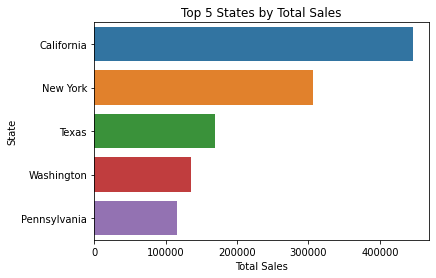

In [21]:
sns.barplot(x=data.head(5)['sales'], y=data.head(5)['state'])
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Top 5 States by Total Sales')

In [22]:
# Top selling products
data = df.groupby(['sub-category','product_name'])['order_id'].count()\
    .reset_index(name='count').sort_values('count', ascending=False)
data.head(10)

,sub-category,product_name,count
798,Envelopes,Staple envelope,47
834,Fasteners,Staples,46
1185,Paper,Easy-staple paper,44
446,Binders,Avery Non-Stick Binders,20
397,Art,Staples in misc. colors,18
1791,Supplies,Staple remover,18
575,Binders,Storex Dura Pro Binders,17
1838,Tables,KI Adjustable-Height Table,17
1002,Furnishings,Staple-based wall hangings,16
749,Chairs,"Situations Contoured Folding Chairs, 4/Set",15


In [35]:
# number of orders per year
data = df.groupby('order_year')['order_id'].count()\
    .reset_index(name='count').sort_values('order_year', ascending=True)
data.head(10)


,order_year,count
0,2015,1953
1,2016,2055
2,2017,2534
3,2018,3258


<AxesSubplot:xlabel='order_year', ylabel='count'>

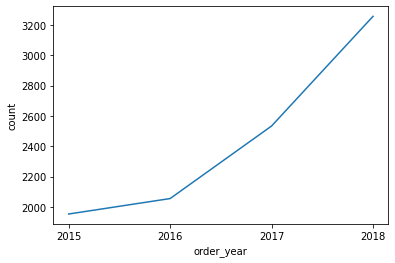

In [36]:
sns.lineplot(x=data['order_year'], y=data['count'])

<AxesSubplot:xlabel='category', ylabel='count'>

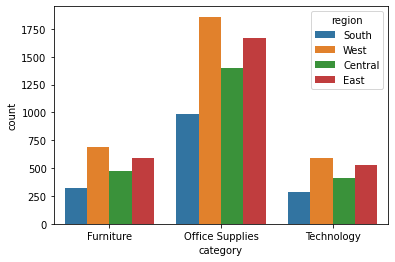

In [38]:
# count of category by region
sns.countplot(data=df, x='category', hue='region')


In [41]:
# top customers by sales
data = df.groupby('customer_name')['sales'].sum()\
    .reset_index(name='sales').sort_values('sales', ascending=False)
data.head(10)

,customer_name,sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072
